<p style="font-family: Arial; font-size:2.2em;color:purple; font-style:bold">

Karar Ağaçları (Decision Tree) Kullanarak Hava Durumu 
Sınıflandırması <br><br>
scikit-learn
<br><br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Günlük Hava Durumu Analizi</p>



<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Gerekli Kütüphanelerin İçe Aktarılması<br></p>

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image, display,HTML
CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

CSV Dosyası ile Pandas DataFrame oluşturma<br></p>


In [6]:
url='https://raw.githubusercontent.com/cagriemreakin/Machine-Learning/master/classification/weather/daily_weather.csv'

In [7]:
data = pd.read_csv(url)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Hakkında</p>
<br>
San Diego,California eyaletine ait 2011 - 2014 arasındaki hava durumu değerleridir.Meteroloji binasındaki sensorler tarafında sıcaklık, basınç ve nemdeğerleri kayıt yaz-kış bütün mevsimler için kayıt altına alınmıştır.
<br><br>
Şimdi bu değerleri kullanark hava durumu için analiz yapalım.

In [9]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')


Dataset içindeki değerlerin açıklaması:

* **number:** satır sayısı
* **air_pressure_9am:** 8:55 to 9:04 arasındaki ortalama basınç (*Unit: hectopascals*)
* **air_temp_9am:** 8:55 to 9:04 arasındaki ortalama sıcaklık (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** 8:55 to 9:04 arasındaki ortalama rüzgar yönü (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** 8:55 to 9:04 arasındaki ortalama rüzgar hızı (*Unit: miles per hour*)
* ** max_wind_direction_9am:** 8:55 to 9:04 arasındaki ortalama kuvvetli rüzgar (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** 8:55 to 9:04 arasındaki ortalama kuvvetli rüzgar hızı (*Unit: miles per hour*)
* **rain_accumulation_9am:** 24 saatlik yağmur miktarı (*Unit: millimeters*)
* **rain_duration_9am:**24 saat içindeki yağmur yağma süresi(*Unit: seconds*)
* **relative_humidity_9am:**Ortalama bağıl nem 8:55  ila 9:04 arasındaki . (*Unit: percent*)
* **relative_humidity_3pm:** Ortalama bağıl nem 2:55  ila 3:04 arasındak (*Unit: percent *)


In [12]:
data.head(10)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


Veri işlemenin ilk adımı temiz bir veri elde etmektir.Hücredeki boş (null)değerler hesaplamaların yanlış olmasına sebep olabilir.Satırlardaki boş değerleri bulalım.

In [14]:

data[data.isnull().any(axis=1)] 

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Gereksiz Veri'den Kurtulalım<br><br></p>

Kaç tane satır sayısına ihtiyacımız olmadığı için silelim.

In [15]:
del data['number']

boş değerleri pandas dropna fonksiyonunu kullanarak silelim

In [20]:
silmeden_once = data.shape[0]
print(silmeden_once)

1064


In [17]:
data = data.dropna()

In [18]:
sildikten_sonra = data.shape[0]
print(print(sildikten_sonra))

1064
None


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Temizleme işleminden sonra kalan satır sayısı?<br><br></p>


In [22]:
silmeden_once - sildikten_sonra

0

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Sınıflandırma İşlemi<br><br></p>
İkili sistemde sınıflandırma relative_humidity_3pm (saat 3'teki nispi nem miktarı) to 0 or 1.<br>



In [23]:
clean_data = data.copy() #temizlediğimiz veri setini kopyaladık
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1 #nem oranı 24.99'dan büyük olanları 1 olarak işaretle
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      0
15      0
17      0
18      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
       ..
1064    1
1065    1
1067    1
1068    1
1069    1
1070    1
1071    1
1072    0
1073    1
1074    1
1075    0
1076    0
1077    1
1078    0
1079    1
1080    0
1081    0
1082    1
1083    1
1084    1
1085    1
1086    1
1087    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int32


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Sonucu  'y' de sakla.
<br><br></p>


In [27]:
y=clean_data[['high_humidity_label']].copy()
#y

In [25]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [29]:
y.head() # 25 ve büyük değerler için 1 olarak işaretlendi

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Saat 3'teki Nem miktarını bulmak için Saat 9'daki sensor değerlerini kullanalım
<br><br></p>


In [35]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']


In [36]:
X = clean_data[morning_features].copy()# morning features'ın içindeki indeklere göre cleandata değerlerini Z' e kopyalam işelemi

In [37]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [38]:
y.columns

Index(['high_humidity_label'], dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>


Test ve Eğitim(Train) Kümeleri Oluşturma 

<br><br></p>



## Hatırlatma: Eğitim Evresi



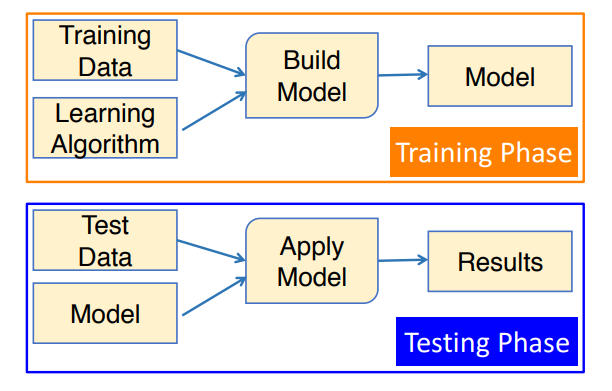

In [41]:
display(Image(filename="C:\\Users\\ceakn\\Desktop\\site-resimler\\class_apply.png", embed=True))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

Yukarıdaki kodun amacı daha önceki yazımda anlattığım test ve eğitim veri setini oluşturmaktır.Yukarıdaki kodda test için veri setinin %33 ü ayrılmıştır.

In [46]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
#y_train.describe()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Fit on Train Set
<br><br></p>


In [47]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0) # 10 adet leaf node' a izin verdik ve ağacı oluşturduk.
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [48]:
type(humidity_classifier)

sklearn.tree.tree.DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Test Kümesinden Çıkarım Yapma

<br><br></p>


In [49]:
predictions = humidity_classifier.predict(X_test)

In [50]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [51]:
y_test['high_humidity_label'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int32

Yukarıdaki değerlere bakarsanız 2 değeriin farklı olduğunu görebilirsiniz.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Başarı Oranını Hesaplama
<br><br></p>


In [52]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.81534090909090906

% 81 başarı